In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report as rep,confusion_matrix as cm

data=pd.read_csv("/lung_cancer2.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data.head()

,Name,Member_ID,Diagnosis,Age,Smokes,Smokes (years),Smokes (packs/year),AreaQ,Alkhol,family history,Result
0,Wick,91550,M,35,3,0.0,0.0,5,4,0,1
1,Constantine,915664,M,27,20,0.0,0.0,2,5,0,1
2,Anderson,915691,M,30,0,0.0,0.0,5,2,0,0
3,Telles,915940,M,28,0,37.0,37.0,8,1,1,0
4,Maradona,91594602,M,68,4,0.0,0.0,5,6,0,1


In [ ]:
data.columns

Index(['Name', 'Member_ID', 'Diagnosis', 'Age', 'Smokes', 'Smokes (years)',
       'Smokes (packs/year)', 'AreaQ', 'Alkhol', 'family history', 'Result'],
      dtype='object')

In [ ]:
data.corr()

,Member_ID,Age,Smokes,Smokes (years),Smokes (packs/year),AreaQ,Alkhol,family history,Result
Member_ID,1.000000,0.053895,0.030370,0.014901,-0.016648,-0.028592,0.005043,-0.033763,0.045809
Age,0.053895,1.000000,0.053665,-0.016531,-0.103422,-0.268957,0.318621,-0.124552,0.637726
Smokes,0.030370,0.053665,1.000000,-0.105877,-0.203021,-0.353295,0.469915,0.000728,0.373444
Smokes (years),0.014901,-0.016531,-0.105877,1.000000,0.797695,0.249845,-0.210502,0.018319,-0.199286
Smokes (packs/year),-0.016648,-0.103422,-0.203021,0.797695,1.000000,0.166865,-0.151494,0.135200,-0.153704
AreaQ,-0.028592,-0.268957,-0.353295,0.249845,0.166865,1.000000,-0.714412,0.132520,-0.746621
Alkhol,0.005043,0.318621,0.469915,-0.210502,-0.151494,-0.714412,1.000000,-0.135589,0.810439
family history,-0.033763,-0.124552,0.000728,0.018319,0.135200,0.132520,-0.135589,1.000000,-0.191686
Result,0.045809,0.637726,0.373444,-0.199286,-0.153704,-0.746621,0.810439,-0.191686,1.000000


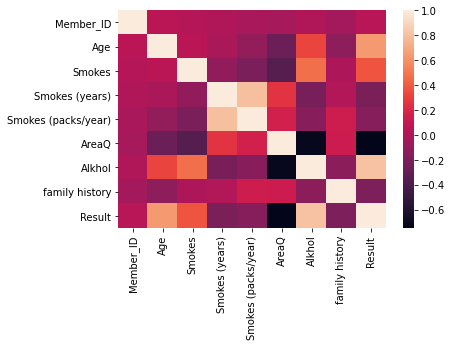

In [ ]:
sns.heatmap(data.corr())

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column gender
data["Diagnosis"]= label_encoder.fit_transform(data["Diagnosis"]) 
data

,Name,Member_ID,Diagnosis,Age,Smokes,Smokes (years),Smokes (packs/year),AreaQ,Alkhol,family history,Result
0,Wick,91550,1,35,3,0.0,0.0,5,4,0,1
1,Constantine,915664,1,27,20,0.0,0.0,2,5,0,1
2,Anderson,915691,1,30,0,0.0,0.0,5,2,0,0
3,Telles,915940,1,28,0,37.0,37.0,8,1,1,0
4,Maradona,91594602,1,68,4,0.0,0.0,5,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1293,Borgnine,926424,1,26,13,0.0,0.0,6,1,0,0
1294,Guinness,926682,0,77,20,0.0,0.0,5,4,0,1
1295,Heston,926954,1,75,15,0.0,0.0,3,5,0,1
1296,Peck,927241,1,43,30,7.0,1.6,3,8,0,1


In [ ]:

data.isnull().any()

Name                   False
Member_ID              False
Diagnosis              False
Age                    False
Smokes                 False
Smokes (years)         False
Smokes (packs/year)    False
AreaQ                  False
Alkhol                 False
family history         False
Result                 False
dtype: bool

In [ ]:
#Select independent and dependent variables
y= data['Result']
x=data.drop(columns=['Result','Name','Member_ID'])
x



,Diagnosis,Age,Smokes,Smokes (years),Smokes (packs/year),AreaQ,Alkhol,family history
0,1,35,3,0.0,0.0,5,4,0
1,1,27,20,0.0,0.0,2,5,0
2,1,30,0,0.0,0.0,5,2,0
3,1,28,0,37.0,37.0,8,1,1
4,1,68,4,0.0,0.0,5,6,0
...,...,...,...,...,...,...,...,...
1293,1,26,13,0.0,0.0,6,1,0
1294,0,77,20,0.0,0.0,5,4,0
1295,1,75,15,0.0,0.0,3,5,0
1296,1,43,30,7.0,1.6,3,8,0


In [ ]:
#perform normalisation in indeoendent variables
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
Xnorm=scale.fit_transform(x)
print(" normalised data using standarisation ", Xnorm)


 normalised data using standarisation  [[ 0.50529115 -0.47382073 -1.52435619 ... -0.08332128  0.32314781
  -0.91855865]
 [ 0.50529115 -0.97080603  0.62301636 ... -1.31231015  0.74683049
  -0.91855865]
 [ 0.50529115 -0.78443655 -1.90330429 ... -0.08332128 -0.52421755
  -0.91855865]
 ...
 [ 0.50529115  2.01110578 -0.0085638  ... -0.9026472   0.74683049
  -0.91855865]
 [ 0.50529115  0.02316457  1.88617669 ... -0.9026472   2.01787853
  -0.91855865]
 [-1.97905701  0.52014987  1.25459653 ...  1.55533055 -1.37158291
   1.08866211]]


In [ ]:
#Splitting the variables into into test and training sets
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(Xnorm,y,test_size = 0.1,random_state=0)


In [ ]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

classifier_lr = LinearRegression()
classifier_lr.fit(x_train,y_train)
y_lr_pred = classifier_lr.predict(x_test)

#Result

classifier_lr.score(x_test,y_test)*100

87.30715950174923

In [ ]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression() 
log_model.fit(x_train, y_train) 
y_pred_log = log_model.predict(x_test) 
   
  
log_model.score(x_test, y_pred_log)*100

100.0

In [ ]:
# XG Boost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)
y_pred_xg = xgboost_model.predict(x_test)

xgboost_model.score(x_test , y_pred_xg)*100

100.0

In [ ]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

gb_model.score(x_test , y_pred_gb)*100

100.0

In [ ]:
#Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB
classifier_naive = GaussianNB()
classifier_naive.fit(x_train, y_train)
y_naive_pred = classifier_naive.predict(x_test)

#Accuracy

classifier_naive.score(x_test,y_test)*100


93.84615384615384

In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

classifier_rfc = RandomForestClassifier(n_estimators=20, random_state=0)
classifier_rfc.fit(x_train, y_train)
y_rfc_pred = classifier_rfc.predict(x_test)

#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_rfc_pred)*100

100.0

In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(x_train,y_train)
y_dtc_pred = classifier_dtc.predict(x_test)

#accuracy
accuracy_score(y_test,y_dtc_pred)*100

100.0

In [ ]:
#Simple Support Vector Classification

from sklearn.svm import SVC

classifier_svm = SVC()
classifier_svm.fit(x_train, y_train)
y_svm_pred = classifier_svm.predict(x_test)

#Accuracy
classifier_svm.score(x_test,y_test) *100

100.0

In [ ]:
#Kernel Support Vector Classification

from sklearn.svm import SVC

classifier_svc = SVC(kernel='linear',random_state=0)
classifier_svc.fit(x_train,y_train)
y_svc_pred = classifier_svc.predict(x_test)

#accuracy
classifier_svc.score(x_test,y_test)*100

100.0

In [ ]:
#Stochastic Gradient Descent Classifier

from sklearn.linear_model import SGDClassifier

classifier_sgd= SGDClassifier(loss='modified_huber',shuffle=True,random_state=0)
classifier_sgd.fit(x_train,y_train)
y_sgd_pred = classifier_sgd.predict(x_test)

#accuracy
accuracy_score(y_test,y_sgd_pred)*100

100.0

In [ ]:
#Results of the classifications

con_log = cm(y_test,y_pred_log)
con_xg = cm(y_test,y_pred_xg)
con_gb = cm(y_test,y_pred_gb)
con_naive = cm(y_test,y_naive_pred)
con_rfc = cm(y_test,y_rfc_pred)
con_dtc = cm(y_test,y_dtc_pred)
con_svm = cm(y_test,y_svm_pred)
con_svc = cm(y_test,y_svc_pred)
con_sgd = cm(y_test,y_sgd_pred)


print("LOGISTIC REGRESSION MODEL\n",rep(y_test,y_pred_log),"\n", con_log ,"\n")
print("XG BOOST\n",rep(y_test,y_pred_xg),"\n", con_xg ,"\n")
print("GRADIENT BOOSTING CLASSIFIER\n",rep(y_test,y_pred_gb),"\n", con_gb ,"\n")
print("NAIVE BAYES RESULTS\n",rep(y_test,y_naive_pred),"\n", con_naive ,"\n")
print("RANDOM FOREST CLASSIFIER RESULTS\n",rep(y_test,y_rfc_pred),"\n" , con_rfc, "\n")
print("DECISION TREE RESULTS\n",rep(y_test,y_dtc_pred),"\n" , con_dtc , "\n")
print("SIMPLE SUPPORT VECTOR CLASSIFICATION\n",rep(y_test,y_svm_pred),"\n", con_svm , "\n")
print("KERNEL SUPPORT VECTOR CLASSIFICATION\n",rep(y_test,y_svc_pred),"\n", con_svc , "\n")
print("STOCHASTIC GRADIENT DESCENT RESULTS\n",rep(y_test,y_sgd_pred),"\n", con_sgd , "\n")

LOGISTIC REGRESSION MODEL
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        62

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130
 
 [[68  0]
 [ 0 62]] 

XG BOOST
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        62

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130
 
 [[68  0]
 [ 0 62]] 

GRADIENT BOOSTING CLASSIFIER
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        62

    accuracy                           1.00       130
   macro avg   

In [ ]:
predicted_class= classifier_svc.predict(x)
data['Predicted Result']= predicted_class
data[['Result','Predicted Result']]

,Result,Predicted Result
0,1,1
1,1,1
2,0,1
3,0,1
4,1,1
...,...,...
1293,0,1
1294,1,1
1295,1,1
1296,1,1
